# My Project 3: Exploring GapMinder Data
### Will Rodman | Data Science | November 2023

In the third and final project assignment for Tulane Universities Data Science class, I look into the world of linear regression using from [gapminder.org](https://www.gapminder.org/).

I'll be working with a dataset on [GitHub page](https://github.com/jennybc/gapminder).


## Project Start

Before anything, project packages and libraries are installed. 

In [3]:
# Importing packages.  
%pip install requests pandas matplotlib --quiet

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Importing libraries. 
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt


In [4]:
# Downloading data from github.
url = 'https://raw.githubusercontent.com/jennybc/gapminder/main/data-raw/08_gap-every-five-years.tsv'
response = requests.get(url)

if response.status_code != 200:
    print("Url Request Failed.")

In [9]:
# Loading data into Pandas DataFrame. 
df = pd.read_csv(StringIO(response.text), sep='\t')
print(df.shape)
df.head()

(1704, 6)


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Part 1: Exploring Life Expectancy Changes and Economic Measures

In Part 1 of this project, I focus is on understanding how life expectancy has evolved globally over a 50-year period and exploring its relationship with economic indicators such as GDP.

### Exercise 1: Visualizing Life Expectancy

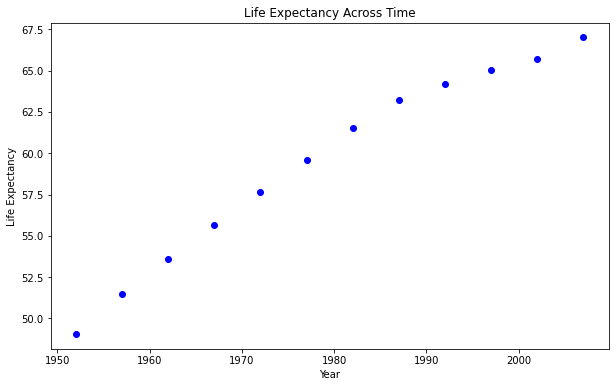

In [78]:
# Scatter plot of life expectancy across time
plt.figure(figsize=(10, 6))
group_df = df.groupby('year')
plt.scatter(group_df['year'].unique(), group_df['lifeExp'].mean(), c='blue')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Across Time')
plt.show()

### Question 1: Analyzing Life Expectancy Trends

Based on the scatter plot, there's a trend in life expectancy over time. This trend in increasing and appears to be linear. 

### Visualizing Life Expectancy with a Violin Plot

Text(0.5, 1.0, 'Violin Plot')

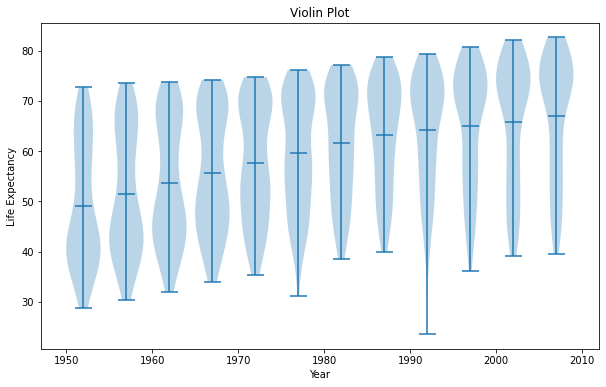

In [31]:
# Wrangling data for plot. 
plt.figure(figsize=(10, 6))
life_exp_per_year = df.groupby('year')['lifeExp'].apply(list).reset_index(name='values')
y =life_exp_per_year['values'].to_list()
x = life_exp_per_year['year'].to_list()

plt.violinplot(y, x, widths=4, showmeans=True)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Violin Plot")



### Question 2: Describing Life Expectancy Distribution

Based on the violin plot, the range of each sample dist. remain consistent over time. However, the skew appear to transition from a positive skew to a negative skew as time increases. Always remaining unimodal, but never symmetric around its center.

### Question 3: Intuition on Linear Regression

Using my own intuition, I believe there could be a linear relationship modeled because the center of each dist. displays an increasing trend over time. In this case, the null hypothesis would be rejected in favor of the alternative hypothesis. 

### Understanding Model Residuals

The next set of questions revolves around model residuals, which are the errors in every prediction made by the model. 

### Question 4: Intuition on Residuals Violin Plot

Considering the violin plots over time transition from a negative to positive skew. I believe departures from the model would occur above the model line at the beginning of time, then occur below the model line at the end of time. 

### Question 5: Assumptions of Linear Regression Model

A perfect linear regression would have residuals that are symmetrically distributed around the mean for each instance of the independent (ie: year) variable, and a violin plot would display a balanced distribution. However our violin plot displays skews, so there will not be a perfect relationship between the variables. Because our model has only one input variable and is linear, this means there is noise we cannot predict for and an "S" pattern of residuals may form along the model line. 

### Exercise 5: Scatter plot and Regression Line.


/var/folders/rq/9zvkr67d2mx07n6md37__xcr0000gn/T/ipykernel_20275/1363191216.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for con, data in df.groupby(['continent']):


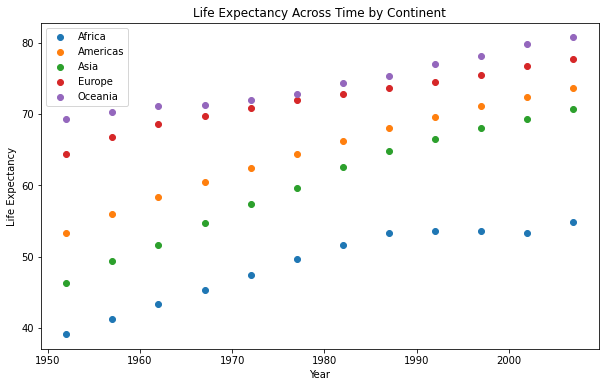

In [75]:
# Plotting data.
plt.figure(figsize=(10, 6))
for con, data in df.groupby(['continent']):
    data = data.groupby('year')
    plt.scatter(data['year'].unique(), data['lifeExp'].mean(), label=con)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Across Time by Continent')
plt.legend()
plt.show()